<a href="https://colab.research.google.com/github/mka-2000/Excelr-assignment/blob/main/EDA_Simple_Linear_Regression(assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Q1)Given is the dataset of Delivery Time and its Sorting Time.We need to predict the delivery time using Sorting Time.
# Since, there is only one dependent variable , here we use Simple Linear Regression to predict the model.

# First ,we import the dataset in google colab 

from google.colab import files
files = files.upload()

Saving delivery_time.xlsx to delivery_time (1).xlsx


In [ ]:
import pandas as pd
dt = pd.read_excel('delivery_time.xlsx')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


First, we get the information of the given table using the info method from pandas.

In [ ]:
# We also like to find , if there is any duplicate rows.If found,we drop it

dt.drop_duplicates()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


There is no Duplicate values in our DataFrame.

In [ ]:
# Next, let us check if there is any missing data in our DataFrame in both the columns

dt[dt.isnull().any(axis=1)]

,Delivery Time,Sorting Time


Since, there are no null values, we can go ahead of next step.

In [ ]:
# We find the basic summary of the given data using Describe method.

In [ ]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


The Describe method gives a basic Summary of the data .

In [ ]:
# We just find the correlation between Delivery time and Sorting Time.
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


A Correlation is a parameter to check how a variable is related to another.Correlation basically ranges from -1 to 1.

-> A Correlation between -0.5 to 0.5 is Weakly Correlated.

-> A Correlation in the range -0.5 to -1  and 0.5 to 1 is Strongly Correlated to each other.



-> Since, the correlation between Delivery Time and Sorting time is 0.825997.Which means there is a strong correlation between Delivery Time and Sorting Time.

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


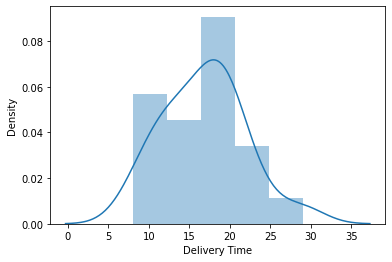

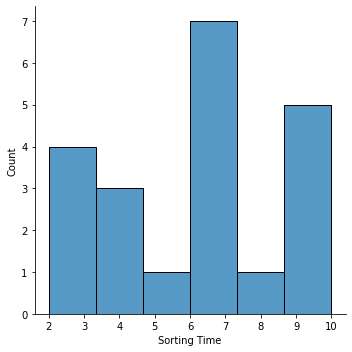

In [ ]:
# Plotting the Graphs.
# We invoke the Distribution plot function from Seaborn.

import seaborn as sns

print(sns.distplot(dt['Delivery Time']))
print(sns.displot(dt['Sorting Time']))

From the graph, we can say that it is a right skewed data.

In [ ]:
# Given to predict Delivery time using Sorting time,
# The dependent variable is - > Delivery time
# The independent variable is  -> Sorting time.

# Finding the Linear Regression Model.

import statsmodels.formula.api as smf

model = smf.ols(("dt['Delivery Time'] ~ dt['Sorting Time']"),data=dt).fit()
model

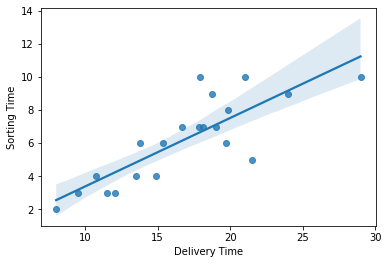

In [ ]:
import seaborn as sns
sns.regplot(x='Delivery Time',y='Sorting Time',data=dt)

The r-squared value of 68.23 % of variation in the dependent variable which is Delivery Time is explained by the independent variable which is Sorting Time. 

In [ ]:
# The Linear Regression line is given as:

# Y = b0 + b1X + e           where b0 is intercept, b1 is slope , e is error

In [ ]:
# Finding Beta -  Coefficients

model.params

Intercept             6.582734
dt['Sorting Time']    1.649020
dtype: float64

In [ ]:
dt['Error']=model.resid
dt                                # These are the error values 

,Delivery Time,Sorting Time,Error
0,21.00,10,3155.841248
1,13.50,4,8127.848783
2,19.75,6,-2236.143681
3,24.00,9,-1167.124842
4,29.00,10,-6691.117306
5,15.35,6,3444.909069
6,19.00,7,6007.912837
7,9.50,3,-1587.079627
8,17.90,10,8412.920373
9,18.75,9,-3568.060788


In [ ]:
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Theses are the values of y variable.

In [ ]:
# Finding r - Squared value for the model.

r_sq = model.rsquared
print('r-squared value = ',round((r_sq*100),2))

r-squared value =  95.7


The r-squared value of 95.7 % of variation in the dependent variable which is Delivery Time is explained by the independent variable which is Sorting Time.

In [ ]:
# 2) We are given with the dataset of Salary and Years of Experience .
# We are required to predict the best fit model to predict it.

# we use Simple Linear Regression to find the best fit model.

In [ ]:

from google.colab import files
files = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [ ]:
import pandas as pd
SD = pd.read_csv('Salary_Data.csv')
SD

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
# First,we would like to see the given information 

SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


As we can see that the SD dataset has an information of Salary and respective Years of Experience.

In [ ]:
# Next , let us check whether we have null values in our dataset

SD[SD.isnull().any(axis=1)]

,YearsExperience,Salary


We dont have any null values in our dataset.

In [ ]:
# Next, we shall see the basic summary of the dataset.
# Using describe method

SD.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# Next , we check what is the correlation between Years of Experience and Salary

SD.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Since, the Years of Experience and Salary have 0.978 coefficient of Correlation.It is highly correlated between each other.

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


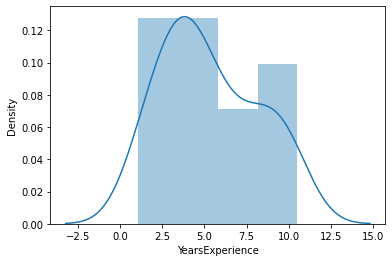

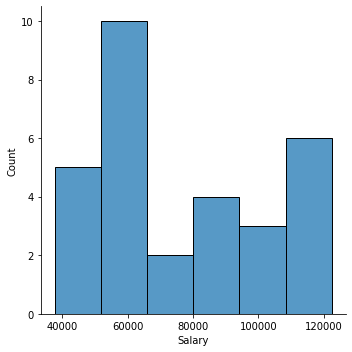

In [ ]:
# Plotting the Graphs.

import seaborn as sns

print(sns.distplot(SD['YearsExperience']))
print(sns.displot(SD['Salary']))

We see that the data is right skewed data which was given to us.

In [ ]:
# Given to predict Salary using Years of Experience,
# The dependent variable is - > Salary
# The independent variable is  -> Years of Experience.

# Fitting the Linear Regression Model.

import statsmodels.formula.api as smf

model = smf.ols(("SD['Salary'] ~ SD['YearsExperience']"),data=SD).fit()
model

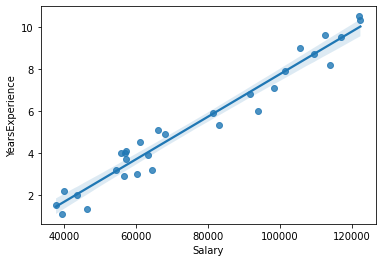

In [ ]:
import seaborn as sns
sns.regplot(x='Salary',y='YearsExperience',data=SD)

The r squared value of the model is 95.69%.This states that the variation in the dependent variable , which is Salary , is explained by the independent variable,which is Years of Experience.

In [ ]:
# Finding Beta - Coefficient values

model.params

Intercept                25792.200199
SD['YearsExperience']     9449.962321
dtype: float64

In [ ]:
model.fittedvalues              # These are the values for all the y values which is the equation of line.
                                   
                                # Y = b0 + b1X + e           where b0 is intercept, b1 is slope , e is error   
                                   

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [ ]:
SD['Error'] = model.resid
SD                                             # We also add the error column.

,YearsExperience,Salary,Error
0,1.1,39343,3155.841248
1,1.3,46205,8127.848783
2,1.5,37731,-2236.143681
3,2.0,43525,-1167.124842
4,2.2,39891,-6691.117306
5,2.9,56642,3444.909069
6,3.0,60150,6007.912837
7,3.2,54445,-1587.079627
8,3.2,64445,8412.920373
9,3.7,57189,-3568.060788


In [ ]:
model.rsquared

0.9569566641435086

In [ ]:
model.rsquared*100

95.69566641435085

The r squared value of the model is 95.69%.This states that the 95.69% variation in the dependent variable , which is Salary , is explained by the independent variable,which is Years of Experience.